In [1]:
# Linear Regression Implementation from Scractch
%matplotlib inline
import random
import tensorflow as tf
import numpy as np
from d2l import tensorflow as d2l

In [2]:
# Generating the (Synthetic) Data Set
def synthetic_data(w, b, num_examples): #@save
    """Generate y = Xw + b + noise."""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1,1))
    return X, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)


2022-02-03 08:18:22.257212: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
print('features:', features[0], '\nlabel:', labels[0])

features: tf.Tensor([1.3016489 1.9395368], shape=(2,), dtype=float32) 
label: tf.Tensor([0.21523689], shape=(1,), dtype=float32)


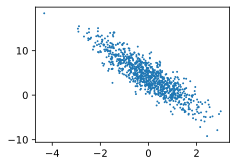

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].numpy(), labels.numpy(), 1)

In [5]:
# Reading the Dataset
# Since minibatch method is so fundamental to training machine learning algorithms,
# it is worth defining a utility function to shuffle the dataset and access it in minibatches.
# Each minibatch consists of a tuple of features and labels.
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples)) # I think this is used for sampling minibatches.
    # The examples are read at random, in no particular order.
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i + batch_size, num_examples)]) # 마지막 minibatch를 고려한 code로서, min()이 고려되었다.
        yield tf.gather(features, j), tf.gather(labels, j)

In [6]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tf.Tensor(
[[ 0.8726069  -0.06939807]
 [-0.517478    2.029698  ]
 [ 0.41785082 -1.8773025 ]
 [ 1.3875396  -0.11339028]
 [-0.24166103  0.61095506]
 [ 0.569305   -1.5896446 ]
 [ 0.06857836 -0.22789209]
 [-0.6237994  -0.7964735 ]
 [ 0.4216826   0.5824532 ]
 [ 0.8712946   1.7932656 ]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[ 6.1889315 ]
 [-3.7386653 ]
 [11.410015  ]
 [ 7.368428  ]
 [ 1.6358013 ]
 [10.748548  ]
 [ 5.118341  ]
 [ 5.6726327 ]
 [ 3.0637321 ]
 [-0.16040659]], shape=(10, 1), dtype=float32)


In [7]:
# Initializing Model Parameters
w = tf.Variable(tf.random.normal(shape=(2,1), mean = 0, stddev = 0.01), trainable = True)
#w = tf.Variable(tf.zeros(shape=(2,1)), trainable = True)
b = tf.Variable(tf.zeros(1), trainable=True)

In [8]:
# Defining the Model
def linreg(X, w, b): #@save
    """"The linear regression model."""
    return tf.matmul(X, w) + b

In [9]:
# Defining the Loss Function
# Looking over the functional form, the summation is not made yet.
def squared_loss(y_hat, y): #@save
    """"Squared loss."""
    return(y_hat - tf.reshape(y, y_hat.shape)) **2 / 2

In [10]:
# Defining the Optimization Algorithm
def sgd(params, grad, lr, batch_size): #@save
    """"Minibatch Stochastic Gradient Descent"""
    for param, grad in zip(params, grad):
        param.assign_sub(lr*grad/batch_size) # think of the sgd formula

In [11]:
# Training
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(X,w,b), y) # Minibatch loss in 'X' and 'y'
        # Compute gradient on l w.r.t. ['w', 'b']
        # Same as l = tf.reduce_sum(loss(net(X,w,b), y))
        dw, db = g.gradient(l, [w, b])
        # Update parameters using their gradient
        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.030511
epoch 2, loss 0.000102
epoch 3, loss 0.000045


In [12]:
# In this case, because we synthesized the dataset ourselves, we know precisely what the true parameters are.
print(f'error in estimating w: {true_w - tf.reshape(w, true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: [ 0.00082397 -0.00066185]
error in estimating b: [0.00037193]
